# Work Description

In this jupyter notebook, the idea is to illustrate how to use TensotrFlow 2.0 for a multi-label clasification problem. In this case we have a public data set which is namely fashion_mnist provided by Zalando https://github.com/zalandoresearch/fashion-mnist

# 0- Import Libraries and Set-Up The Working Environment

In [1]:

import matplotlib.pyplot as plt

import tensorflow as tf
print(tf.__version__)

import warnings
warnings.filterwarnings("ignore")



2.0.0


# 1- Need Data Loading

In [2]:
mnist = tf.keras.datasets.fashion_mnist
(training_images_data, training_labels), (test_images_data, test_labels) = mnist.load_data()

In [3]:
# In order to seee how many unique label we have in the training labels
set(training_labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [4]:
# In order to seee how many unique label that we have in the training labels
print("The unique labels that we have in the training labels", set(training_labels))

# In order to seee how many unique label we have in the test labels
print("The unique labels that we have in the test labels", set(test_labels))

('The unique labels that we have in the training labels', set([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))
('The unique labels that we have in the test labels', set([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))


## 1.1 - EXAMPLE DATA IMAGES

In [5]:
#Observe a randomly selected image e.g. the second image in the dataset which has 28 by 28 pixels
# This means that when we flaten the image we will have a sequence/array which has 28 times 28 = 784 values
training_images_data[1].shape

(28, 28)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

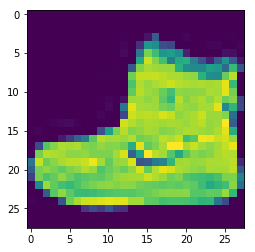

In [6]:
#observe some randomly selected images from the fashion dataset
print(training_images_data[0])
plt.imshow(training_images_data[0])


[[  0   0   0   0   0   0   0  11 142 200 106   0   0   0   0   0   0   0
   85 185 112   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 152 214 217 194 236 216 187 149 135 153 211 217
  231 205 217 188  34   0   0   0   0   0]
 [  0   0   0   0   0  66 185 166 180 181 190 211 221 197 146 198 206 191
  168 190 172 188 175   0   0   0   0   0]
 [  0   0   0   0   0 135 153 160 175 180 170 186 187 190 188 190 187 174
  195 185 174 161 175  59   0   0   0   0]
 [  0   0   0   0   0 161 147 160 170 178 177 180 168 173 174 171 185 184
  185 172 171 164 174 120   0   0   0   0]
 [  0   0   0   0   2 175 146 145 168 178 181 185 180 184 178 179 187 191
  193 190 181 171 172 158   0   0   0   0]
 [  0   0   0   0  35 177 155 140 151 172 191 187 186 187 186 187 182 191
  194 188 180 161 161 185   0   0   0   0]
 [  0   0   0   0  59 170 153 141 120 154 160 161 172 168 166 161 165 172
  170 164 139 149 162 166  21   0   0   0]
 [  0   0   0   0  79 145 160 214 123 128 153 160 164 158 157 15

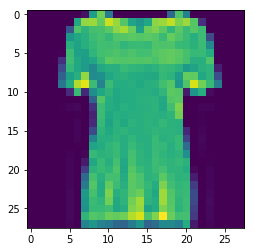

In [7]:
#observe some randomly selected images from the fashion dataset
print(training_images_data[10])
plt.imshow(training_images_data[10])

# 2- Data Processing

## 2.1 - Normalize Data 
The pixel values, for each example image, varies from 0 to 255.
For a number of reasons, e.g. due to the activation funciton, we need to normalize the input data to represent the values between 0 and 1:

In [8]:
training_images_data  = training_images_data / 255.0
test_images_data = test_images_data / 255.0

# 3- Configuration of The AI Model

In [9]:
#if you need to clean the TF session if you have run another TF model prevoisly
tf.keras.backend.clear_session()

#Configure the model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(32, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


In [10]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [11]:
model.fit(training_images_data, training_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 138us/sample - loss: 0.5134 - accuracy: 0.8193
Epoch 2/10
60000/60000 [==============================] - 8s 125us/sample - loss: 0.3777 - accuracy: 0.8609
Epoch 3/10
60000/60000 [==============================] - 8s 126us/sample - loss: 0.3400 - accuracy: 0.8751
Epoch 4/10
60000/60000 [==============================] - 8s 126us/sample - loss: 0.3190 - accuracy: 0.8823
Epoch 5/10
60000/60000 [==============================] - 8s 126us/sample - loss: 0.3016 - accuracy: 0.8887
Epoch 6/10
60000/60000 [==============================] - 8s 126us/sample - loss: 0.2845 - accuracy: 0.8948
Epoch 7/10
60000/60000 [==============================] - 8s 126us/sample - loss: 0.2719 - accuracy: 0.8976
Epoch 8/10
60000/60000 [==============================] - 8s 126us/sample - loss: 0.2615 - accuracy: 0.9024
Epoch 9/10
60000/60000 [==============================] - 8s 126us/sample - loss: 0.2513 - accuracy: 0.9050
Epoch

In [12]:
model.evaluate(test_images_data, test_labels)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.32925755318403244, 0.884]